In [1]:
import yt
import yt_aspect

In [2]:
ds = yt.load("aspect_all/morefaults/solution-00100.pvtu")

yt : [INFO     ] 2021-09-16 14:48:15,842 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-09-16 14:48:15,843 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-09-16 14:48:15,843 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-09-16 14:48:15,844 Parameters: domain_right_edge         = [500000. 500000. 101641.]
yt : [INFO     ] 2021-09-16 14:48:15,844 Parameters: cosmological_simulation   = 0


when you do

In [3]:
ds.length_unit

unyt_quantity(1., 'm')

that `length_unit` tells you what the `code_length` is. meaning if you have an array that is:

In [9]:
new_array = ds.arr([1, 1, 1], "code_length")
new_array

unyt_array([1, 1, 1], 'code_length')

you have an array of 1,1,1 meters. If you convert to `'m'`, you'll get ones:

In [10]:
new_array.to('m')

unyt_array([1., 1., 1.], 'm')

So our domain center is actually in meters here: 

In [46]:
print(ds.domain_center)

[250000.  250000.   50820.5] code_length


and when were setting a height of 0.95, we were setting 0.95 meters... the bottom of the box...

yt : [INFO     ] 2021-09-16 14:55:23,173 xlim = 0.000000 500000.000000
yt : [INFO     ] 2021-09-16 14:55:23,173 ylim = 0.000000 500000.000000
yt : [INFO     ] 2021-09-16 14:55:23,174 xlim = 0.000000 500000.000000
yt : [INFO     ] 2021-09-16 14:55:23,174 ylim = 0.000000 500000.000000
yt : [INFO     ] 2021-09-16 14:55:23,175 Making a fixed resolution buffer of (('all', 'strain_rate')) 800 by 800



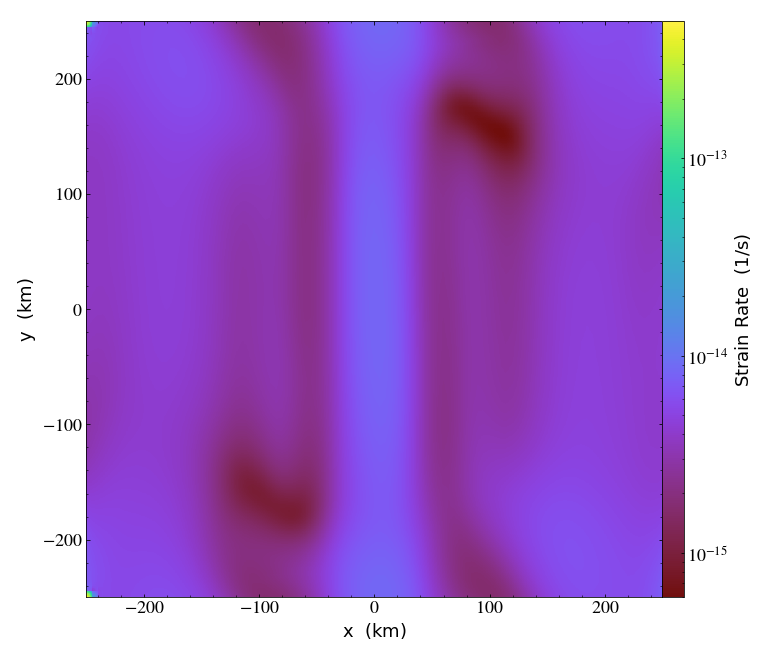

In [17]:
c = ds.domain_center
c[2] = 0.95
slc = yt.SlicePlot(ds, "z", ("all", "strain_rate"), center=c)
slc.set_log(("all", "strain_rate"), True)
slc.show()

So we should have been specifying meters... so our domain dimensional info here is in m:

In [21]:
print(ds.domain_center)
print(ds.domain_width)

[250000.  250000.   50820.5] code_length
[500000. 500000. 101641.] code_length


In [23]:
ds.domain_width.to('km')

unyt_array([500.   , 500.   , 101.641], 'km')

that max height of 101.641 km corresponds to the top of the highest element. If we slice at 90 km:

yt : [INFO     ] 2021-09-16 14:57:57,828 xlim = 0.000000 500.000000
yt : [INFO     ] 2021-09-16 14:57:57,829 ylim = 0.000000 500.000000
yt : [INFO     ] 2021-09-16 14:57:57,829 xlim = 0.000000 500000.000000
yt : [INFO     ] 2021-09-16 14:57:57,830 ylim = 0.000000 500000.000000
yt : [INFO     ] 2021-09-16 14:57:57,831 Making a fixed resolution buffer of (('all', 'strain_rate')) 800 by 800



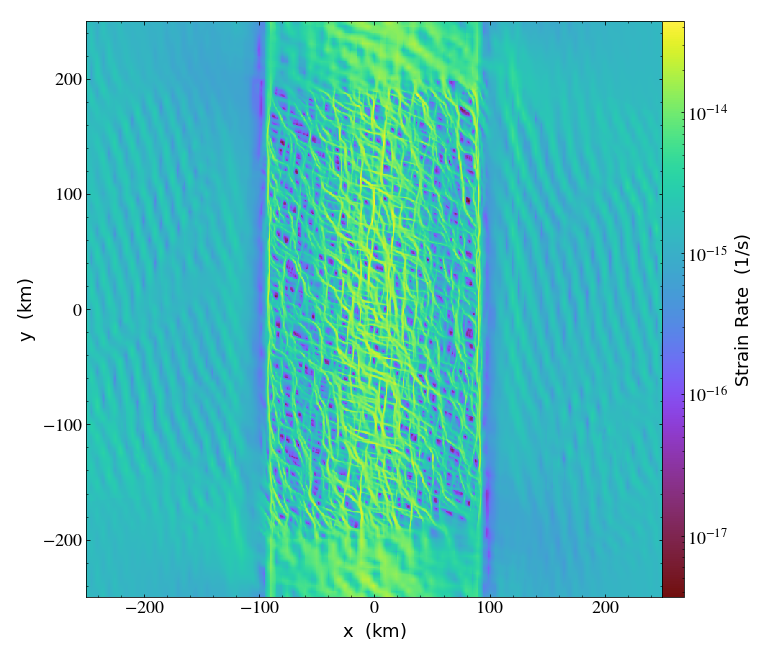

In [25]:
c = ds.arr([250, 250, 90], 'km')
slc = yt.SlicePlot(ds, "z", ("all", "strain_rate"), center=c)
slc.set_log(("all", "strain_rate"), True)
slc.show()

we get what's expected! 

If we slice higher, we can actually see the free surface effects because the slice returns empty values in the sections where the top of the free surface is lower than the slice

yt : [INFO     ] 2021-09-16 14:58:54,459 xlim = 0.000000 500.000000
yt : [INFO     ] 2021-09-16 14:58:54,459 ylim = 0.000000 500.000000
yt : [INFO     ] 2021-09-16 14:58:54,460 xlim = 0.000000 500000.000000
yt : [INFO     ] 2021-09-16 14:58:54,460 ylim = 0.000000 500000.000000
yt : [INFO     ] 2021-09-16 14:58:54,461 Making a fixed resolution buffer of (('all', 'strain_rate')) 800 by 800



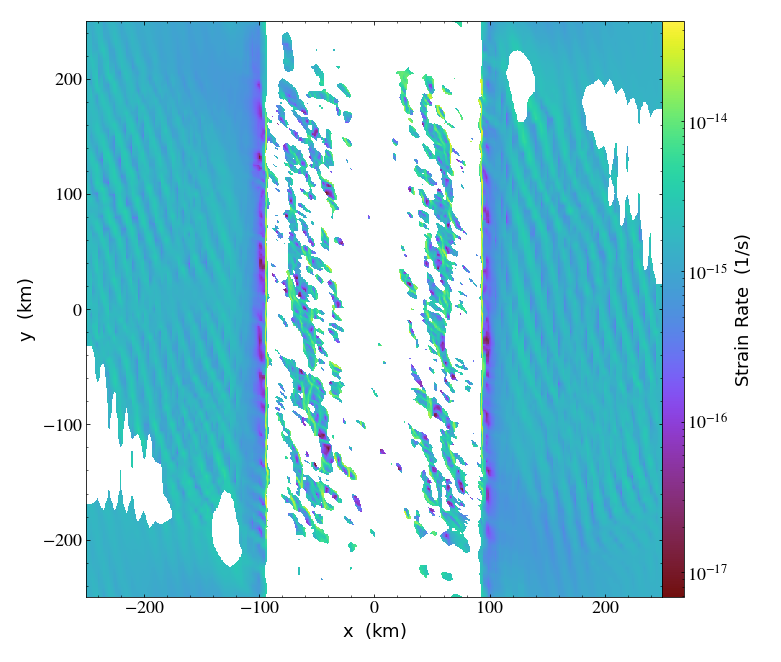

In [26]:
c = ds.arr([250, 250, 100], 'km')
slc = yt.SlicePlot(ds, "z", ("all", "strain_rate"), center=c)
slc.set_log(("all", "strain_rate"), True)
slc.show()

plotting perpendicular to `y` with a center at 80 km height will focus the plot, and we can zoom in to see the free surface:

yt : [INFO     ] 2021-09-16 15:05:49,671 xlim = 0.000000 500.000000
yt : [INFO     ] 2021-09-16 15:05:49,672 ylim = 29.179500 130.820500
yt : [INFO     ] 2021-09-16 15:05:49,672 xlim = 0.000000 500000.000000
yt : [INFO     ] 2021-09-16 15:05:49,673 ylim = 29179.500000 130820.500000
yt : [INFO     ] 2021-09-16 15:05:49,674 Making a fixed resolution buffer of (('all', 'strain_rate')) 800 by 800



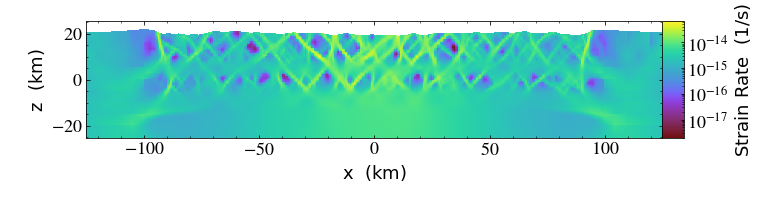

In [43]:
slc = yt.SlicePlot(ds, "y", ("all", "strain_rate"), center = ds.arr([250, 250, 80], 'km'))
slc.set_log(("all", "strain_rate"), True)
slc.zoom(2)
slc.show()

note, to change the coordinates to be what you expect, you can use the `origin` keyword argument in the initial call: 

```
slc = yt.SlicePlot(ds, "y", ("all", "strain_rate"), center = ds.arr([250, 250, 80], 'km'), origin = "native")
```
or modify the origin after the fact:


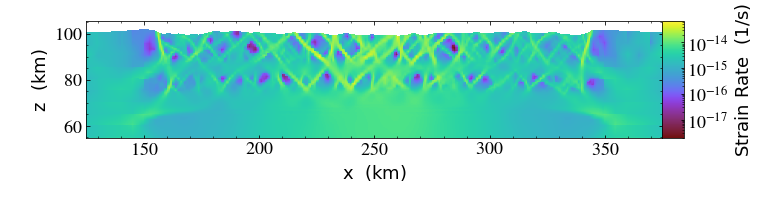

In [45]:
slc.set_origin("native")